## Advanced Data Analysis:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import scipy
from scipy import stats

In [2]:
df=pd.read_csv("dataframe_for_visual.csv")
df

,game_name,user_score,platform,developer,developer_score,publisher,publisher_score,rating,release_month,release_year,num_crit_review,num_pos_critic,num_mix_critic,num_neg_critic,descriptions,genre_2,score
0,The Legend of Zelda: Ocarina of Time,9.1,Nintendo 64,Nintendo,76.0,Nintendo,76.0,E,11,1998,22,22,0,0,"As a young boy, Link is tricked by Ganondorf, ...",adventure,99
1,Tony Hawk's Pro Skater 2,7.5,PlayStation,Neversoft Entertainment,80.0,Activision,68.0,T,9,2000,19,19,0,0,As most major publishers' development efforts ...,sports,98
2,Grand Theft Auto IV,7.8,PlayStation 3,Rockstar North,90.0,Rockstar Games,81.0,M,4,2008,64,64,0,0,[Metacritic's 2008 PS3 Game of the Year; Also ...,action,98
3,SoulCalibur,8.5,Dreamcast,Namco,70.0,Namco,70.0,T,9,1999,24,24,0,0,"This is a tale of souls and swords, transcendi...",action,98
4,Grand Theft Auto IV,7.9,Xbox 360,Rockstar North,90.0,Rockstar Games,81.0,M,4,2008,86,86,0,0,[Metacritic's 2008 Xbox 360 Game of the Year; ...,action,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19159,Vroom in the Night Sky,3.2,Switch,Poisoft,37.0,Poisoft,37.0,E,4,2017,15,0,0,15,Vroom in the night sky is a magical bike actio...,sports,17
19160,Leisure Suit Larry: Box Office Bust,1.9,PlayStation 3,Team17,70.0,Funsta,21.0,M,5,2009,11,0,0,11,The Leisure Suit Larry: Box Office Bust video ...,adventure,17
19161,Yaris,4.4,Xbox 360,Backbone Entertainment,66.0,Backbone Entertainment,66.0,E10+,10,2007,7,0,0,7,[Xbox Live Arcade] Hop into a Toyota Yaris an...,sports,17
19162,Ride to Hell: Retribution,1.4,PC,Eutechnyx,52.0,Deep Silver,67.0,M,6,2013,9,0,0,9,The game is set in the last years of the roari...,action,16


We treated the release month column as catagorical

In [3]:
df['release_month'] = pd.Categorical(df['release_month'])

We dropped all the string columns, also we decided to drop descriptions as we thought there was no need to try and analyze the text.

In [4]:
df_for_model=df.drop(['num_crit_review','publisher','developer','descriptions','game_name'],axis=1)
df_for_model

,user_score,platform,developer_score,publisher_score,rating,release_month,release_year,num_pos_critic,num_mix_critic,num_neg_critic,genre_2,score
0,9.1,Nintendo 64,76.0,76.0,E,11,1998,22,0,0,adventure,99
1,7.5,PlayStation,80.0,68.0,T,9,2000,19,0,0,sports,98
2,7.8,PlayStation 3,90.0,81.0,M,4,2008,64,0,0,action,98
3,8.5,Dreamcast,70.0,70.0,T,9,1999,24,0,0,action,98
4,7.9,Xbox 360,90.0,81.0,M,4,2008,86,0,0,action,98
...,...,...,...,...,...,...,...,...,...,...,...,...
19159,3.2,Switch,37.0,37.0,E,4,2017,0,0,15,sports,17
19160,1.9,PlayStation 3,70.0,21.0,M,5,2009,0,0,11,adventure,17
19161,4.4,Xbox 360,66.0,66.0,E10+,10,2007,0,0,7,sports,17
19162,1.4,PC,52.0,67.0,M,6,2013,0,0,9,action,16


We used One Hot Encoding for our catagory columns as label encoder will create a situation were it treated each different label as ordinal when they are not, thus hurting the model.

In [5]:
catagory_list=['platform','rating','genre_2']
for catag in catagory_list:
        df_for_model[catag]= df_for_model[catag].astype('category')
        df_for_model=pd.get_dummies(df_for_model,columns=[catag],prefix=[catag])

In [6]:
df_for_model=df_for_model[["user_score","developer_score","publisher_score","release_month","release_year",
                           "num_pos_critic","num_mix_critic","num_neg_critic","platform_3DS","platform_DS",
                           "platform_Dreamcast","platform_Game Boy Advance","platform_GameCube","platform_Nintendo 64",
                           "platform_PC","platform_PSP","platform_PlayStation","platform_PlayStation 2","platform_PlayStation 3",
                           "platform_PlayStation 4","platform_PlayStation 5","platform_PlayStation Vita","platform_Stadia",
                           "platform_Switch","platform_Wii","platform_Wii U","platform_Xbox","platform_Xbox 360","platform_Xbox One",
                           "platform_Xbox Series X","rating_AO","rating_E","rating_E10+","rating_K-A","rating_M","rating_RP",
                          "rating_T","genre_2_RPG","genre_2_Strategy","genre_2_action","genre_2_adventure","genre_2_arcade",
                           "genre_2_simulator","genre_2_sports","score"]]
df_for_model

,user_score,developer_score,publisher_score,release_month,release_year,num_pos_critic,num_mix_critic,num_neg_critic,platform_3DS,platform_DS,...,rating_RP,rating_T,genre_2_RPG,genre_2_Strategy,genre_2_action,genre_2_adventure,genre_2_arcade,genre_2_simulator,genre_2_sports,score
0,9.1,76.0,76.0,11,1998,22,0,0,0,0,...,0,0,0,0,0,1,0,0,0,99
1,7.5,80.0,68.0,9,2000,19,0,0,0,0,...,0,1,0,0,0,0,0,0,1,98
2,7.8,90.0,81.0,4,2008,64,0,0,0,0,...,0,0,0,0,1,0,0,0,0,98
3,8.5,70.0,70.0,9,1999,24,0,0,0,0,...,0,1,0,0,1,0,0,0,0,98
4,7.9,90.0,81.0,4,2008,86,0,0,0,0,...,0,0,0,0,1,0,0,0,0,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19159,3.2,37.0,37.0,4,2017,0,0,15,0,0,...,0,0,0,0,0,0,0,0,1,17
19160,1.9,70.0,21.0,5,2009,0,0,11,0,0,...,0,0,0,0,0,1,0,0,0,17
19161,4.4,66.0,66.0,10,2007,0,0,7,0,0,...,0,0,0,0,0,0,0,0,1,17
19162,1.4,52.0,67.0,6,2013,0,0,9,0,0,...,0,0,0,0,1,0,0,0,0,16


We scaled the data using a scaling method called Yeo - Johnson which takes the data and transforms it into a gaussian distribution.
We also left the code where we used a standard scaling method, this method gave us worst results in almost all the models, so we decided to go we the latter.

[this code was taken from this site](https://medium.com/@patricklcavins/using-scipys-powertransformer-3e2b792fd712)


In [7]:
scaled_list=['user_score','developer_score','publisher_score','num_pos_critic','num_neg_critic','num_mix_critic']
for cat in scaled_list:
    vec = np.array(df_for_model[cat])
    pt = PowerTransformer(method='yeo-johnson')
    vec = vec.reshape(-1, 1)
    pt.fit(vec)
    transformed_data = pt.transform(vec)
    transformed_data = [i[0] for i in transformed_data]
    df_for_model[cat] = transformed_data       
        
'''
    vec = np.array(df_for_model[cat])
    scale = StandardScaler()
    vec = vec.reshape(-1, 1)
    scale.fit(vec)
    transformed_data = scale.transform(vec)
    transformed_data = [i[0] for i in transformed_data]
    df_for_model[cat] = transformed_data
'''

'\n    vec = np.array(df_for_model[cat])\n    scale = StandardScaler()\n    vec = vec.reshape(-1, 1)\n    scale.fit(vec)\n    transformed_data = scale.transform(vec)\n    transformed_data = [i[0] for i in transformed_data]\n    df_for_model[cat] = transformed_data\n'

In [8]:
df_for_model.to_csv("dataframe_for_model.csv",index=False)
df_for_model.corr()

,user_score,developer_score,publisher_score,release_year,num_pos_critic,num_mix_critic,num_neg_critic,platform_3DS,platform_DS,platform_Dreamcast,...,rating_RP,rating_T,genre_2_RPG,genre_2_Strategy,genre_2_action,genre_2_adventure,genre_2_arcade,genre_2_simulator,genre_2_sports,score
user_score,1.000000,0.272728,0.184169,-0.244737,0.454511,-0.196524,-0.332809,0.003600,0.028516,0.062926,...,-0.010652,0.000953,0.080201,0.036333,0.005912,-0.028820,-0.024646,-0.014993,-0.034094,0.503197
developer_score,0.272728,1.000000,0.622253,0.168363,0.558520,-0.267339,-0.493083,0.002509,-0.084739,-0.004917,...,-0.003826,-0.000455,0.066924,0.023696,-0.024545,-0.009172,-0.014072,-0.038925,0.000713,0.654517
publisher_score,0.184169,0.622253,1.000000,0.173395,0.398649,-0.185567,-0.341745,0.040086,-0.052553,-0.022150,...,0.000788,-0.010263,0.054059,-0.019334,-0.051932,0.021764,0.011033,-0.039168,0.016619,0.466529
release_year,-0.244737,0.168363,0.173395,1.000000,0.016837,-0.044044,-0.190891,0.054233,-0.113816,-0.142458,...,0.006687,0.091012,0.050697,-0.015696,0.012103,0.148840,-0.015687,-0.017442,-0.215706,0.083749
num_pos_critic,0.454511,0.558520,0.398649,0.016837,1.000000,-0.105138,-0.516714,0.014482,-0.055550,-0.010193,...,-0.016332,-0.023618,0.090754,0.014037,0.033445,-0.078634,-0.044140,-0.028217,0.023387,0.812894
num_mix_critic,-0.196524,-0.267339,-0.185567,-0.044044,-0.105138,1.000000,0.380574,0.041480,0.029104,-0.046897,...,0.001644,0.020853,0.003441,-0.029976,0.076162,-0.010843,-0.017495,0.000233,-0.051067,-0.387623
num_neg_critic,-0.332809,-0.493083,-0.341745,-0.190891,-0.516714,0.380574,1.000000,0.011713,0.054118,-0.006050,...,0.001685,-0.000495,-0.039678,-0.030952,0.048351,0.007312,-0.006656,0.000922,-0.012678,-0.763578
platform_3DS,0.003600,0.002509,0.040086,0.054233,0.014482,0.041480,0.011713,1.000000,-0.028704,-0.011802,...,-0.004323,-0.054644,0.021295,-0.008599,-0.036536,0.019533,0.035892,0.003038,-0.019716,-0.011653
platform_DS,0.028516,-0.084739,-0.052553,-0.113816,-0.055550,0.029104,0.054118,-0.028704,1.000000,-0.016097,...,-0.005896,-0.102887,0.021076,-0.003444,-0.064272,0.002460,0.109587,0.003626,-0.026338,-0.066668
platform_Dreamcast,0.062926,-0.004917,-0.022150,-0.142458,-0.010193,-0.046897,-0.006050,-0.011802,-0.016097,1.000000,...,-0.002424,-0.014971,-0.018359,-0.019428,0.006032,-0.013699,-0.017114,0.005252,0.050162,0.021314


Creating the y and X data

In [9]:
y=df_for_model["score"]
y

0        99
1        98
2        98
3        98
4        98
         ..
19159    17
19160    17
19161    17
19162    16
19163    11
Name: score, Length: 19164, dtype: int64

In [10]:
X=df_for_model.drop("score",axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Linear Regression Model:**

In [12]:
lr = linear_model.LinearRegression()
trained_model=lr.fit(X=X_train, y=y_train)

In [13]:
predicted=trained_model.predict(X_test)

In [14]:
predicted

array([56.39875782, 63.39526157, 85.48463718, ..., 63.87620159,
       76.21589488, 77.29387167])

In [15]:
r2_score(y_test,predicted)

0.8668819785220941

Our R2 Score is: 0.87.

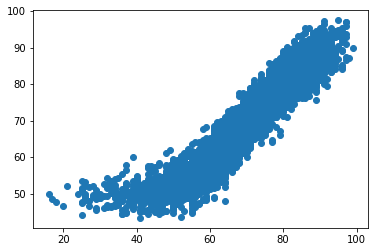

In [24]:
plt.scatter(y_test,predicted)

**Decision Tree Model:**

In [26]:
clf = tree.DecisionTreeRegressor()
trained_model_tree=clf.fit(X=X_train, y=y_train)
predicted_tree=trained_model_tree.predict(X_test)

In [27]:
r2_score(y_test,predicted_tree)

0.9180670891249673

Our R2 Score with the decision tree model is higher: 0.92

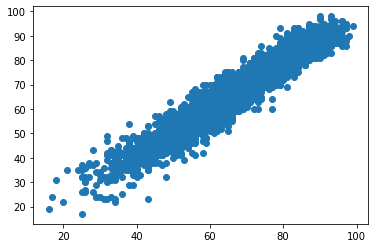

In [28]:
plt.scatter(y_test,predicted_tree)

**Random Forest Model:**

In [29]:
regr = RandomForestRegressor()
regr.fit(X=X_train, y=y_train)
predicted_tree_rand=regr.predict(X_test)

In [30]:
r2_score(y_test,predicted_tree_rand)

0.9577137234332204

Our R2 score is even higher with this model: 0.96

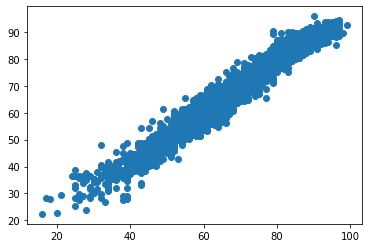

In [31]:
plt.scatter(y_test,predicted_tree_rand)

**KNN Model:**

We had to check which N was the best option

In [32]:
for i in range(2,10):
    
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X=X_train, y=y_train)
    predicted_knn=neigh.predict(X_test)
    print(r2_score(y_test,predicted_knn))
    

0.8402963861440539
0.8590774873550091
0.8663971451913883
0.8705934544671838
0.872888006729678
0.87394286152281
0.875840459039546
0.8771876194226406


We found that the elbow was around the N = 6 or N = 5, so we decided to go with the N = 6.

In [33]:
neigh = KNeighborsRegressor(n_neighbors=6)
neigh.fit(X=X_train, y=y_train)
predicted_knn=neigh.predict(X_test)
r2_score(y_test,predicted_knn)

0.872888006729678

The KNN R2 Score was: 0.87 which was higher than the linear regression model but lower then the decision tree model.

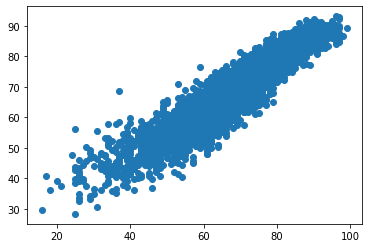

In [34]:
plt.scatter(y_test,predicted_knn)

All model predictions compared to the real score.

In [35]:
df_check=pd.DataFrame({"true":y_test,"linear_regression":predicted,"decision_tree":predicted_tree,
                       "random_forest":predicted_tree_rand,"knn":predicted_knn})
df_check

,true,linear_regression,decision_tree,random_forest,knn
16666,57,56.398758,64.0,57.31,59.000000
13198,66,63.395262,68.0,63.10,67.500000
344,91,85.484637,91.0,89.81,87.500000
3974,81,84.255929,77.0,81.05,79.500000
13275,66,68.015731,68.0,67.22,70.166667
...,...,...,...,...,...
4209,80,79.882151,76.0,77.81,81.500000
10098,72,66.520215,70.0,69.28,70.000000
8805,74,63.876202,65.0,66.21,65.166667
5123,79,76.215895,78.0,77.34,79.500000


## Conclusions
- From our research into the subject we could see, that the highest rated console was the Nintendo 64, which would be logical given that there were less games at that time (1996) which correlates directly to the the fact that those years were highly rated. 

- The Genres of adventure and action had more games, but the highest rated genre was RPG. Even though the difference between the genres is smaller than we enticipated.

- User score and the metacritic score top games didn't overlap - This is in due to two problems: Critics tend to be more critical than the average player. the second problem is that in recent years gamers have been using metacritic's user option to attack certain games in what is called "review bombing": Giving a low user score to games in order to "punish" the developers.

- From the correlation table we could see that the most influential columns were: User score, developer score, publisher score, the number of positive reviews and number of negative reviews.

- After trying 4 algorithms we could the best one was Random Forest. with the highest R2 score.

This project was challenging and enlightening. We gained many insights into the world of data science and gaming.
We are looking forward to working on more of these projects in the future.